# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import joblib

# Data Preprocessing

In [2]:
df = pd.read_csv('./Mall_Customers.csv')

In [3]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [4]:
df.replace({"Gender": {'Male': 1, 'Female':0}}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
df.shape

(200, 5)

In [16]:
x = df.iloc[:,[3, 4]].values

## Chooice Number of Clustors

WCSS - Within Clusters Sum of Squares

In [19]:
# Finding wcss value for different number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

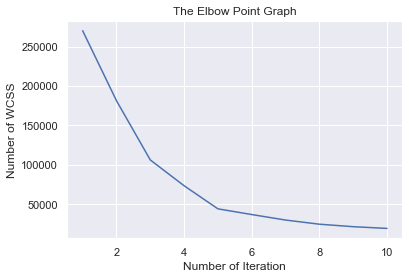

In [24]:
# plot an elbow grap

sns.set()
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Iteration')
plt.ylabel("Number of WCSS")
plt.title("The Elbow Point Graph")
plt.show()

# Optimal number of clustors = 5

In [32]:
# Training the k-means Clustering Model
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)

# return the label each data points based on their cluster
y = kmeans.fit_predict(x)

print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


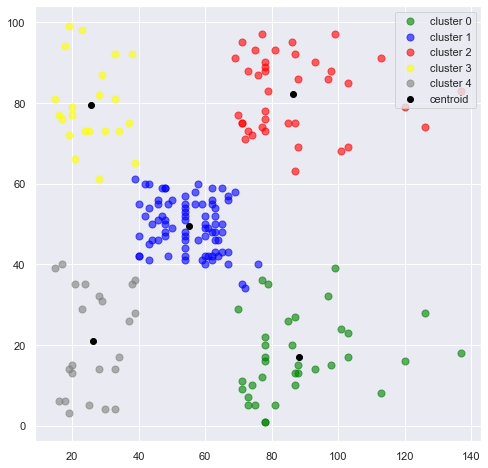

In [50]:
# Plotting all the clusters and the their centroids

plt.figure(figsize=(8, 8))
plt.scatter(x[y==0,0], x[y==0,1], c='green', label='cluster 0', s=50, alpha=0.6)
plt.scatter(x[y==1,0], x[y==1,1], c='blue', label='cluster 1', s=50, alpha=0.6)
plt.scatter(x[y==2,0], x[y==2,1], c='red', label='cluster 2', s=50, alpha=0.6)
plt.scatter(x[y==3,0], x[y==3,1], c='yellow', label='cluster 3', s=50, alpha=0.6)
plt.scatter(x[y==4,0], x[y==4,1], c='grey', label='cluster 4', s=50, alpha=0.6)

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', label='centroid')
plt.legend(loc=1)
plt.show()